<a href="https://colab.research.google.com/github/SriramyaK/introduction_to_ml_with_python/blob/master/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython
import sklearn

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


In [0]:
cancer = load_breast_cancer()

In [0]:
X_train,X_test, y_train,y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [105]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [0]:
tree = DecisionTreeClassifier(max_depth=5,min_samples_split=10,random_state=0)

In [107]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [108]:
print("Accuracy on training set:{:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on testing set:{:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set:0.986
Accuracy on testing set:0.944


In [0]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', class_names= ['Malignant','Benign'],feature_names=cancer.feature_names, impurity=False,filled=True)


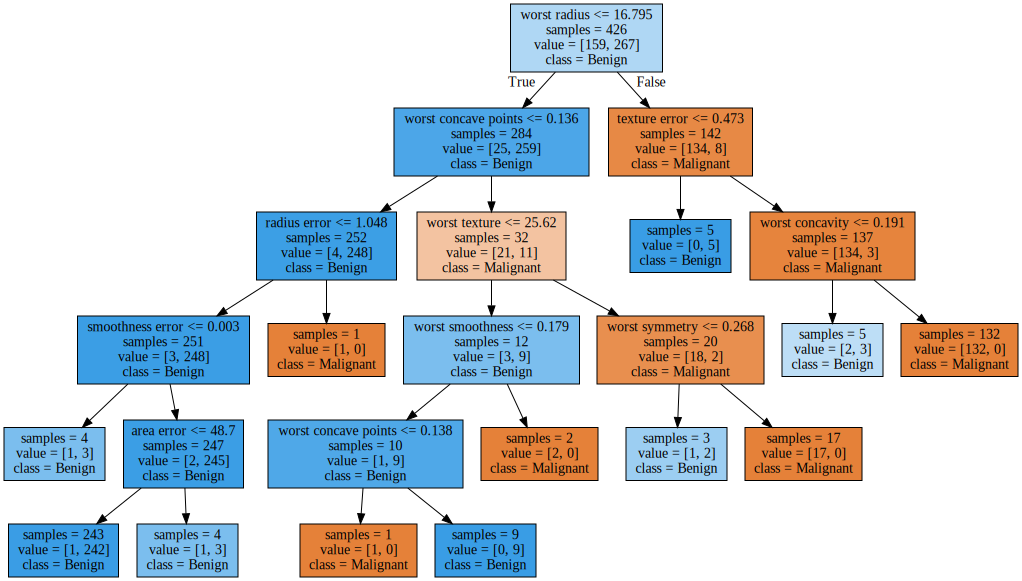

In [110]:
import graphviz

with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

In [111]:
print('Feature importance:\n{}'.format(tree.feature_importances_))

Feature importance:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01020401 0.04842978
 0.         0.00249675 0.00241717 0.         0.         0.
 0.         0.         0.72730201 0.03325292 0.         0.
 0.01416693 0.         0.01819985 0.13163737 0.01189322 0.        ]


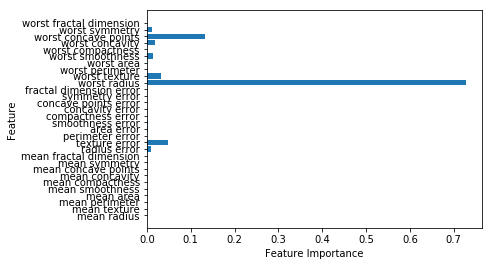

In [114]:
def plot_graph(model):
  n_features = cancer.data.shape[1]
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("Feature Importance")
  plt.ylabel("Feature")
  
  
plot_graph(tree)